# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **Kaggle Titanic DataSet**
>
>This dataset was one of the first I worked on and today I feel able to explore it better and with more techniques.
>
>Extension: .csv
>
>Source: https://www.kaggle.com/azeembootwala/titanic
>
>Date: 01-02-2022
>
> **Main Skills of this project:** 
> - **Data Preparation**
> - **Data Cleansing**  
> - **Data Wrangling**  
> - Data pre-processing
> - Exploratory Data Analysis (EAD)
> - Data Visualization

# Importing Essential Libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing DataSet
- pandas.read_csv — pandas 1.3.5 documentation (pydata.org)

In [177]:
path = r"C:\Users\lucas\OneDrive\Documents\TI\DataScience\Projects\Titanic\titanic_preprocessed.csv"
df = pd.read_csv(path, sep =',')

In [178]:
display(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,male,S
887,1.0,1.0,19.0,0.0,0.0,30.0000,female,S
888,0.0,3.0,20.0,1.0,2.0,23.4500,female,S
889,1.0,1.0,26.0,0.0,0.0,30.0000,male,C


# Checking Data Type

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Sex       891 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(6), object(2)
memory usage: 55.8+ KB


# First Analysis

In [180]:
for v in df: 
    grafico = px.histogram(df, x = v, color='Survived')
    grafico.show()

> Data is **not balanced**: Survived population is almost half of the entire population!  
> 
> - First Class seems to survive more than others  
> - Males also seems to survive more than females, but not proportionaly  
> - Better to investigate the age more deeply  
> - Does having relatives on the ship make you more likely to die?  
> - Better to investigate parch more deeply   
> - Check Fare proportions  
> - Investigate types of ship Embarke in external materials
>
> **These questions raised will be answered throughout the analysis**

In [181]:
population = df.shape[0]
for atribute in df:
    print(f'{atribute}')
    count = 0
    for v in df[atribute].unique():
        for result in df[atribute]:
            if result == v:
                count += 1
        print(f'{v}', end=' -> ')
        print(f'{(count/population)*100:.0f}%')
        count = 0
    print(' ')
        

Survived
0.0 -> 62%
1.0 -> 38%
 
Pclass
3.0 -> 55%
1.0 -> 24%
2.0 -> 21%
 
Age
22.0 -> 3%
38.0 -> 2%
26.0 -> 2%
35.0 -> 2%
26.5 -> 0%
54.0 -> 1%
2.0 -> 1%
27.0 -> 2%
14.0 -> 1%
4.0 -> 1%
58.0 -> 1%
20.0 -> 2%
39.0 -> 2%
55.0 -> 0%
31.0 -> 2%
34.0 -> 2%
15.0 -> 1%
28.0 -> 3%
8.0 -> 0%
37.75 -> 1%
19.0 -> 4%
22.5 -> 1%
33.0 -> 4%
40.0 -> 2%
66.0 -> 0%
42.0 -> 2%
21.0 -> 3%
18.0 -> 3%
3.0 -> 1%
27.5 -> 2%
15.5 -> 0%
7.0 -> 0%
49.0 -> 1%
29.0 -> 3%
65.0 -> 0%
28.5 -> 0%
5.0 -> 0%
11.0 -> 0%
45.0 -> 1%
11.5 -> 0%
17.0 -> 2%
32.0 -> 2%
16.0 -> 2%
25.0 -> 3%
0.83 -> 0%
30.0 -> 3%
23.0 -> 2%
24.0 -> 3%
46.0 -> 0%
59.0 -> 0%
71.0 -> 0%
37.0 -> 1%
47.0 -> 1%
14.5 -> 0%
70.5 -> 0%
32.5 -> 0%
12.0 -> 0%
67.75 -> 1%
9.0 -> 1%
36.5 -> 0%
51.0 -> 1%
55.5 -> 1%
40.5 -> 1%
45.5 -> 1%
44.0 -> 1%
1.0 -> 1%
30.5 -> 0%
61.0 -> 0%
56.0 -> 0%
50.0 -> 1%
36.0 -> 2%
19.5 -> 0%
25.5 -> 0%
20.5 -> 0%
30.75 -> 0%
62.0 -> 0%
41.0 -> 1%
52.0 -> 1%
63.0 -> 0%
23.5 -> 0%
39.5 -> 0%
0.92 -> 0%
43.0 -> 1%
60.0 -> 0%
29

In [182]:
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 0)].count()[0]

80

In [183]:
population = df.shape[0]
for atribute in df:
    print(f'{atribute}')
    for v in df[atribute].unique():
        print(v)
        for i in [0, 1]:
            if i == 0:
                print('Not Survived: ', end=' -> ')
                val_0 = df.loc[(df[atribute] == v) & (df['Survived'] == i)].count()[0]
                print(f'{val_0}', end = ' ----- ')
                print(f'{(val_0/population)*100:.0f}%')
                
            elif i == 1:
                print('Survived: ', end=' -> ')
                val_1 = df.loc[(df[atribute] == v) & (df['Survived'] == i)].count()[0]
                print(f'{val_1}', end = ' ----- ')
                print(f'{(val_1/population)*100:.0f}%')
        print(f'Survived/Death Ratio ------------------------------------ {((val_1/(val_0+val_1))*100):.1f}%')
        print(' ')
    

Survived
0.0
Not Survived:  -> 549 ----- 62%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
1.0
Not Survived:  -> 0 ----- 0%
Survived:  -> 342 ----- 38%
Survived/Death Ratio ------------------------------------ 100.0%
 
Pclass
3.0
Not Survived:  -> 372 ----- 42%
Survived:  -> 119 ----- 13%
Survived/Death Ratio ------------------------------------ 24.2%
 
1.0
Not Survived:  -> 80 ----- 9%
Survived:  -> 136 ----- 15%
Survived/Death Ratio ------------------------------------ 63.0%
 
2.0
Not Survived:  -> 97 ----- 11%
Survived:  -> 87 ----- 10%
Survived/Death Ratio ------------------------------------ 47.3%
 
Age
22.0
Not Survived:  -> 18 ----- 2%
Survived:  -> 12 ----- 1%
Survived/Death Ratio ------------------------------------ 40.0%
 
38.0
Not Survived:  -> 12 ----- 1%
Survived:  -> 7 ----- 1%
Survived/Death Ratio ------------------------------------ 36.8%
 
26.0
Not Survived:  -> 12 ----- 1%
Survived:  -> 6 ----- 1%
Survived/Death Ratio ------

Not Survived:  -> 3 ----- 0%
Survived:  -> 3 ----- 0%
Survived/Death Ratio ------------------------------------ 50.0%
 
63.0
Not Survived:  -> 0 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
23.5
Not Survived:  -> 1 ----- 0%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
39.5
Not Survived:  -> 2 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 50.0%
 
0.92
Not Survived:  -> 0 ----- 0%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
43.0
Not Survived:  -> 4 ----- 0%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 20.0%
 
60.0
Not Survived:  -> 2 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 50.0%
 
29.5
Not Survived:  -> 0 ----- 0%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
10.

Not Survived:  -> 6 ----- 1%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
15.2458
Not Survived:  -> 2 ----- 0%
Survived:  -> 3 ----- 0%
Survived/Death Ratio ------------------------------------ 60.0%
 
8.1583
Not Survived:  -> 1 ----- 0%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
8.6625
Not Survived:  -> 12 ----- 1%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 7.7%
 
73.5
Not Survived:  -> 5 ----- 1%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
14.4542
Not Survived:  -> 6 ----- 1%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 14.3%
 
56.4958
Not Survived:  -> 2 ----- 0%
Survived:  -> 5 ----- 1%
Survived/Death Ratio ------------------------------------ 71.4%
 
7.65
Not Survived:  -> 3 ----- 0%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 25.

Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
134.5
Not Survived:  -> 0 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
6.2375
Not Survived:  -> 1 ----- 0%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
57.9792
Not Survived:  -> 0 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
28.5
Not Survived:  -> 1 ----- 0%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
133.65
Not Survived:  -> 0 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
15.9
Not Survived:  -> 0 ----- 0%
Survived:  -> 2 ----- 0%
Survived/Death Ratio ------------------------------------ 100.0%
 
9.225
Not Survived:  -> 2 ----- 0%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ 0.0%
 
35.0
Not Survived:  -> 

Not Survived:  -> 427 ----- 48%
Survived:  -> 217 ----- 24%
Survived/Death Ratio ------------------------------------ 33.7%
 
C
Not Survived:  -> 75 ----- 8%
Survived:  -> 93 ----- 10%
Survived/Death Ratio ------------------------------------ 55.4%
 
Q
Not Survived:  -> 47 ----- 5%
Survived:  -> 30 ----- 3%
Survived/Death Ratio ------------------------------------ 39.0%
 
nan
Not Survived:  -> 0 ----- 0%
Survived:  -> 0 ----- 0%
Survived/Death Ratio ------------------------------------ nan%
 


C:\Users\lucas\AppData\Local\Temp/ipykernel_24372/2375729696.py:18: RuntimeWarning:

invalid value encountered in longlong_scalars



> - **First Class seems to survive more than others**  
> indeed,  
> PClass 1's chances of survival are nearly twice as high  
> PClass 2 are 47%  
> Pclass 3's chances of die are nearly 3 times as high


> - **Males also seems to survive more than females, but not proportionaly**
> Males survived more in absolute numbers, but females did it proportionaly  
> 74% of females survide  
> 19% of males survived  

# Futher analysis on Age

In [184]:
list_age = []
for v in df['Age']:
    if v <= 5:
        list_age.append('1 - 5')
    elif v <= 10:
        list_age.append('6 - 10')
    elif v <= 15:
        list_age.append('11 - 15')
    elif v <= 20:
        list_age.append('16 - 20')
    elif v <= 30:
        list_age.append('21 - 30')
    elif v <= 40:
        list_age.append('31 - 40')
    elif v <= 50:
        list_age.append('41 - 55')
    elif v <= 60:
        list_age.append('51 - 60')
    elif v <= 70:
        list_age.append('61 - 70')
    elif v <= 80:
        list_age.append('71 - 80')
df['Age_Range'] = list_age

In [185]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Age_Range
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S,21 - 30
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C,31 - 40
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S,21 - 30
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S,31 - 40
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S,31 - 40
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,male,S,21 - 30
887,1.0,1.0,19.0,0.0,0.0,30.0000,female,S,16 - 20
888,0.0,3.0,20.0,1.0,2.0,23.4500,female,S,16 - 20
889,1.0,1.0,26.0,0.0,0.0,30.0000,male,C,21 - 30


In [186]:
grafico = px.histogram(df, x = df.Age_Range, color='Survived')
grafico.show()

In [187]:
for v in df['Age_Range'].unique():
        print(v)
        for i in [0, 1]:
            if i == 0:
                print('Not Survived: ', end=' -> ')
                val_0 = df.loc[(df['Age_Range'] == v) & (df['Survived'] == i)].count()[0]
                print(f'{val_0}', end = ' ----- ')
                print(f'{(val_0/population)*100:.0f}%')
                
            elif i == 1:
                print('Survived: ', end=' -> ')
                val_1 = df.loc[(df['Age_Range'] == v) & (df['Survived'] == i)].count()[0]
                print(f'{val_1}', end = ' ----- ')
                print(f'{(val_1/population)*100:.0f}%')
        print(f'Survived/Death Ratio ------------------------------------ {((val_1/(val_0+val_1))*100):.1f}%')
        print(' ')

21 - 30
Not Survived:  -> 187 ----- 21%
Survived:  -> 101 ----- 11%
Survived/Death Ratio ------------------------------------ 35.1%
 
31 - 40
Not Survived:  -> 133 ----- 15%
Survived:  -> 79 ----- 9%
Survived/Death Ratio ------------------------------------ 37.3%
 
51 - 60
Not Survived:  -> 32 ----- 4%
Survived:  -> 19 ----- 2%
Survived/Death Ratio ------------------------------------ 37.3%
 
1 - 5
Not Survived:  -> 13 ----- 1%
Survived:  -> 32 ----- 4%
Survived/Death Ratio ------------------------------------ 71.1%
 
11 - 15
Not Survived:  -> 9 ----- 1%
Survived:  -> 15 ----- 2%
Survived/Death Ratio ------------------------------------ 62.5%
 
16 - 20
Not Survived:  -> 69 ----- 8%
Survived:  -> 48 ----- 5%
Survived/Death Ratio ------------------------------------ 41.0%
 
6 - 10
Not Survived:  -> 13 ----- 1%
Survived:  -> 7 ----- 1%
Survived/Death Ratio ------------------------------------ 35.0%
 
61 - 70
Not Survived:  -> 23 ----- 3%
Survived:  -> 4 ----- 0%
Survived/Death Ratio -----

> - **Better to investigate the age more deeply**  
> Proportionally, children from 0 to 5 years old were the ones that survived the most   
> 11 to 15 also had better chances od survival (57%)  
> Oddly, children aged 6 to 10 years maintained survival rates close to the average  
> Elderly people had death as the most likely outcome  

> - **Does having relatives on the ship make you more likely to die?**  
> The answer is probably yes

In [188]:
col = ['SibSp', 'Parch']
df_ = df[col]

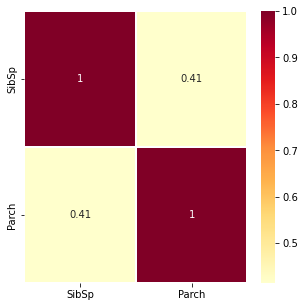

In [189]:
correlations = df_.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(correlations, cmap = "YlOrRd", linewidths=0.1, annot = True)
plt.show()

> - **Better to investigate parch more deeply**  
> Attribute closely linked with SibSp

In [190]:
df['Fare'].max()

512.3292

In [191]:
list_fare = []
for v in df['Fare']:
    if v == 0:
        list_fare.append('0')
    elif v <= 10:
        list_fare.append('1 - 10')
    elif v <= 20:
        list_fare.append('11 - 20')
    elif v <= 40:
        list_fare.append('21 - 40')
    elif v <= 80:
        list_fare.append('41 - 80')
    elif v <= 160:
        list_fare.append('81 - 160')
    elif v <= 320:
        list_fare.append('161 - 320')
    elif v <= 513:
        list_fare.append('321 - 513')

df['Fare_range'] = list_fare
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Age_Range,Fare_range
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S,21 - 30,1 - 10
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C,31 - 40,41 - 80
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S,21 - 30,1 - 10
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S,31 - 40,41 - 80
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S,31 - 40,1 - 10
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,male,S,21 - 30,11 - 20
887,1.0,1.0,19.0,0.0,0.0,30.0000,female,S,16 - 20,21 - 40
888,0.0,3.0,20.0,1.0,2.0,23.4500,female,S,16 - 20,21 - 40
889,1.0,1.0,26.0,0.0,0.0,30.0000,male,C,21 - 30,21 - 40


In [192]:
grafico = px.histogram(df, x = df.Fare_range, color='Survived')
grafico.show()

In [193]:
for v in df['Fare_range'].unique():
        print(v)
        for i in [0, 1]:
            if i == 0:
                print('Not Survived: ', end=' -> ')
                val_0 = df.loc[(df['Fare_range'] == v) & (df['Survived'] == i)].count()[0]
                print(f'{val_0}', end = ' ----- ')
                print(f'{(val_0/population)*100:.0f}%')
                
            elif i == 1:
                print('Survived: ', end=' -> ')
                val_1 = df.loc[(df['Fare_range'] == v) & (df['Survived'] == i)].count()[0]
                print(f'{val_1}', end = ' ----- ')
                print(f'{(val_1/population)*100:.0f}%')
        print(f'Survived/Death Ratio ------------------------------------ {((val_1/(val_0+val_1))*100):.1f}%')
        print(' ')

1 - 10
Not Survived:  -> 255 ----- 29%
Survived:  -> 66 ----- 7%
Survived/Death Ratio ------------------------------------ 20.6%
 
41 - 80
Not Survived:  -> 46 ----- 5%
Survived:  -> 56 ----- 6%
Survived/Death Ratio ------------------------------------ 54.9%
 
21 - 40
Not Survived:  -> 114 ----- 13%
Survived:  -> 86 ----- 10%
Survived/Death Ratio ------------------------------------ 43.0%
 
11 - 20
Not Survived:  -> 103 ----- 12%
Survived:  -> 76 ----- 9%
Survived/Death Ratio ------------------------------------ 42.5%
 
161 - 320
Not Survived:  -> 6 ----- 1%
Survived:  -> 13 ----- 1%
Survived/Death Ratio ------------------------------------ 68.4%
 
81 - 160
Not Survived:  -> 11 ----- 1%
Survived:  -> 41 ----- 5%
Survived/Death Ratio ------------------------------------ 78.8%
 
0
Not Survived:  -> 14 ----- 2%
Survived:  -> 1 ----- 0%
Survived/Death Ratio ------------------------------------ 6.7%
 
321 - 513
Not Survived:  -> 0 ----- 0%
Survived:  -> 3 ----- 0%
Survived/Death Ratio -----

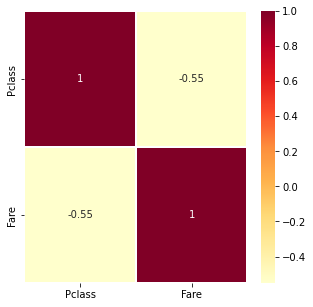

In [194]:
col = ['Pclass', 'Fare']
df_ = df[col]

correlations = df_.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(correlations, cmap = "YlOrRd", linewidths=0.1, annot = True)
plt.show()

> - **Check Fare proportions**  
> As expected, the Pclass and Fare attributes are linked.  
> And having paid more for the ticket suggests that there is a greater chance of surviving, as well as belonging to first class.  
> Very cheap tickets (up to 40$) are more susceptible to death


> **In short, being in the richer classes, being a woman or a child, raises the chances of survival.**

# Exporting Changes in DataSet

In [195]:
#df.to_csv(r'C:\Users\lucas\OneDrive\Documents\TI\DataScience\Projects\Titanic\titanic_preprocessed_2.csv', index=False)